In [43]:
import pandas as pd # For the purpose of data manipulations, data loading and so much more cool stuff!
import matplotlib.pyplot as plt # For the purpose of data visualization in a fancier way!
import numpy as np # For the purpose of randomly get some samples from distributions!

In [2]:
# This code block is purely for Google Colab usage. If you are running this file at your local, you can delete or comment this code block.
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Let's populate our sample set by using mean and standard deviation!
# Remember, we actually do not know the distribution of the data! This part is kinda a secret!
mu = 0 # Here is my mean parameter
sigma = 1 # Here is my standard deviation parameter.
sample_size = 1000 # Parameter for how many samples that we will get
sample_set = np.random.normal(mu, sigma, sample_size)
sample_set

array([ 2.43840150e-01, -4.43214961e-01, -6.43443753e-01, -1.17230637e+00,
       -3.84619670e-02,  1.29191745e+00, -1.56716487e+00,  1.15209922e+00,
       -7.56187987e-01,  9.71602668e-01, -1.94614370e-01, -1.21037377e+00,
        7.02069672e-01,  2.90819952e+00,  1.89389564e-01,  3.60388871e-01,
        2.39985460e+00, -2.15470221e+00,  8.76147884e-01,  4.55062590e-01,
        7.78310243e-01,  7.50512675e-02,  1.18057677e+00,  3.35944451e-01,
       -9.61297676e-01,  6.16510634e-01,  3.70828986e-01, -9.90140939e-01,
        4.55220520e-01,  1.85502975e+00,  1.36921566e-01, -1.02086809e+00,
       -2.35870466e-03,  1.30248886e-01,  4.37596038e-01, -5.38326777e-01,
       -2.30383986e-01, -1.30893797e-01,  4.43817357e-01,  2.98998651e-01,
        1.66720372e+00,  9.61753524e-01, -6.08550892e-01,  4.75443397e-01,
        2.08054542e+00,  2.36256678e-01,  6.02421229e-01,  4.80829850e-01,
       -7.88411646e-02,  1.65057250e+00,  2.90724565e-01, -7.07132924e-01,
       -5.15920788e-01, -

In [13]:
# For the calculation of the mean, we can technically use pre-built functions. However for the sake of the example, we will calculate it by ourselves!
# We will use a function called find_mean with single parameter of our sample_set!
def find_mean(sample_set):
  mean = 0 # Assign it to zero when you define it!
  counter = 0 # Let's count how many samples we have, since we dont know it!
  summation = 0 # Remember the formula of mean, we need to add every sample and keep it in somewhere!

# We will find the summations and number of samples in the set with this for loop!
  for value in sample_set:
    summation += value
    counter += 1
# Summation divided by number of samples, will give us the average value, and therefore mean!
  mean = summation / counter
  return mean


In [24]:
# Let's now call our shiny mean function to get the mean value of our sample set!
our_mean = find_mean(sample_set)
print("The mean value that we have calculated: " + str(our_mean))
print("Lets check the results with numpy mean function!: " + str(np.mean(sample_set)))

The mean value that we have calculated: 0.037871555645982845
Lets check the results with numpy mean function!: 0.03787155564598284


In [34]:
# Let's find the variance of the sample set!
def find_variance (sample_set, mean):
  summation = 0 # Same usage like in the mean function.
  counter = 0 # Same usage like in the mean function.
  for value in sample_set:
    summation += pow(abs(mean - value), 2)
    counter += 1

  # To find the variance now, we need to divide the summation by counter! 
  # Notice that this time the formula of the summation is different then the one we calculated in the mean function!
  variance = summation / (counter -1)
  return variance



In [36]:
# Appearantly we have a slight slight difference between our calculated value and what numpy gives us! 
# The reason is that we have given ddof = 1 for the np.var function. This makes the mean calculation slightly different than us and causes very minor difference!
# np.var mean calculation = x.sum() / (N - ddof)
# Our mean calculation = x.sum() / N
our_variance = find_variance(sample_set, our_mean)
print("The variance value that we have calculated: " + str(our_variance))
print("Lets check the results with numpy variance function!: " + str(np.var(sample_set, ddof = 1)))

The variance value that we have calculated: 1.0990046226826602
Lets check the results with numpy variance function!: 1.0990046226826582


In [39]:
# Finally, it is time to calculate the standard deviation!
# Again we have a similar difference between calculated stds. The reason is pretty much the same with the calculation of the variance!
our_std = pow(our_variance, 0.5)
print("The standard deviation value that we have calculated: " + str(our_std))
print("Lets check the results with numpy standard deviation function!: " + str(np.std(sample_set, ddof = 1)))

The standard deviation value that we have calculated: 1.0483342132558013
Lets check the results with numpy standard deviation function!: 1.0483342132558005


In [41]:
# Normal distribution calculation function!
def normal_distribution(sample_set, mean, std):
  #Let's define our pi and e values! Since we will round up the number, it might cause slight differences in calculations!
  pi = 3.1416
  e = 2.7183
  y_values = []
  for x_value in sample_set:
    # I agree, this part is kind of crazy! But it is the python equivalent of the formula!
    # When reading crazy formulas like that, remember to start from left to right, and from inner expression to outer. It will be more helpful to understand!
    y_value = ( 1/ ( std * pow( (2*pi),0.5 ) ) ) * pow(e, (-0.5 * pow( ( (x_value - mean) / std ), 2 ) ) )
    y_values.append(y_value)

  return y_values

In [42]:
y_values = normal_distribution(sample_set, our_mean, our_std)


No handles with labels found to put in legend.


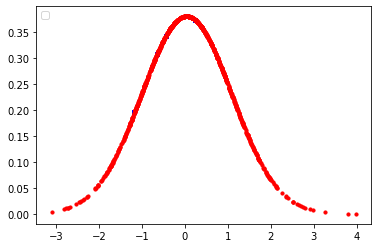

In [45]:
# Now, lets plug our values and results to plot what we got!
# As we can see the big big belly, it is clearly a normal distribution!!
# The best part is, we have made everything by ourselves! Good job!
x = sample_set
y = y_values
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s")
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o")
plt.legend(loc='upper left');
plt.show()

You can also practice the sample implementation examples by yourself. Since the sample data will be random, the results can slightly be different. However, as long as you get a big big belly with some difference, it should be fine!